In [167]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [168]:
def generate_data_3classes(n1,n2,n3, display=True):
    X1 = np.random.randn(n1,2)*0.15 - np.array([0.2 , 0.2])
    X2 = np.random.randn(n2,2)*0.25 + np.array([0.1 , 0.5])
    X3 = np.random.randn(n3,2)*0.15 + np.array([0.6 , 0.2])
    X = np.concatenate((X1,X2,X3), axis=0)
    Y = np.concatenate([np.ones(n1), np.ones(n2)*2, np.ones(n3)*3])-1

    if display:
        plt.plot(X1[:,0], X1[:,1], '.r')
        plt.plot(X2[:,0], X2[:,1], '.g')
        plt.plot(X3[:,0], X3[:,1], '.b')
        plt.show()

    return X,Y

#Converts a class vector (integers) to binary class matrix (copy from keras)
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

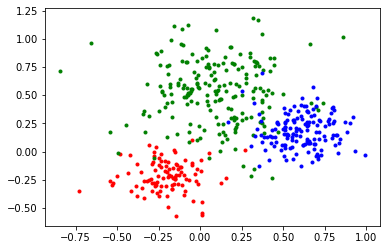

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [169]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_cat = to_categorical(Y_train)

K=Y_cat.shape[1] #nombre de classes
(num_examples,D) = X_train.shape # nombre d'exemples et dimension des exemples

print(Y_cat)

In [170]:
# fonction sigmoide
def sigmo(v):
    return 1/(1+math.e**(-v))

# dérivée de la fonction sigmoide
def sigmop(v):
    return math.e**(-v)/((1+math.e**(-v))**2)

In [171]:
# initialisation aléatoire des poids
W = 1 * np.random.normal(size=(D,K))
b = np.zeros((1,K))

# paramètres de l'apprentissage
step_size = 1e-1
num_iter = 10000

X_train.shape

(450, 2)

In [172]:
# Apprenttissage du réseau
X = X_train
Y = Y_cat

# propagation
for i in range(num_iter):

    v = np.dot(X,W)+b
    y_pred = sigmo(v)
    error = y_pred - Y
    loss = error**2
    loss = np.mean(loss)
    
    if i % 1000 == 0:   
        print('iteration {}: loss {}'.format(i, loss))

    #retro-propagation

    h = (error*sigmop(v)).T
    dL_W =  (2*np.dot(h,X)).T
    dL_b =  2*np.mean(error,axis=0)

    
    W = np.add(W, (-step_size * dL_W))
    b = np.add(b, (-step_size * dL_b))

print(W)
print(dL_W.shape)

iteration 0: loss 0.2049253029720513
iteration 1000: loss 0.041371889895716656
iteration 2000: loss 0.04097574584692503
iteration 3000: loss 0.04083805661524867
iteration 4000: loss 0.04077765467833177
iteration 5000: loss 0.040753940803335255
iteration 6000: loss 0.04075218404946174
iteration 7000: loss 0.04076543070427842
iteration 8000: loss 0.040789594391397094
iteration 9000: loss 0.040821756318611596
[[-13.37824225  -6.27531008  34.87351413]
 [-24.04683779  13.23630395 -13.63677859]]
(2, 3)


In [173]:
# calcul de la précision
v = np.dot(X,W)+b

Y_pred = sigmo(v)
class_pred = np.argmax(Y_pred,axis=1)

print('Training accuracy: {:.2}'.format(np.mean(class_pred == Y_train)))

Training accuracy: 0.95
